In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
def quat_to_euler(x, y, z, w):
    t0 = 2.0 * (w * x + y * z)
    t1 = 1.0 - 2.0 * (x * x + y * y)
    roll = np.arctan2(t0, t1)

    t2 = 2.0 * (w * y - z * x)
    t2 = 1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = np.arcsin(t2)

    t3 = 2.0 * (w * z + x * y)
    t4 = 1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(t3, t4)

    return roll, pitch, yaw

In [3]:
df = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/px4_odom.csv')
# df = df[df['timestamp_us'] < 1e12]
# display(df)
df[['roll', 'pitch', 'yaw']] = df.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
df

,timestamp_us,px,py,pz,qw,qx,qy,qz,yaw_imu,yaw_slam,roll,pitch,yaw
0,85780055,0.00000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0,0,0.000000,0.000000,0.000000e+00
1,85788024,0.00000,0.00000,0.000000,1.000000,-0.000698,-0.000383,-5.744440e-06,0,0,-0.001396,-0.000766,-1.095395e-05
2,85796320,0.00000,0.00000,0.000000,1.000000,0.000038,-0.000063,-3.705780e-06,0,0,0.000075,-0.000126,-7.416303e-06
3,85804207,0.00000,0.00000,0.000000,1.000000,-0.000710,-0.000139,-2.311060e-06,0,0,-0.001421,-0.000277,-4.425283e-06
4,85812154,0.00000,0.00000,0.000000,1.000000,0.000033,-0.000109,-1.728950e-07,0,0,0.000066,-0.000219,-3.530058e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2802,319699039,-7.45801,-6.67757,-0.500015,0.088332,-0.973660,0.207901,-3.099330e-02,0,0,-2.955572,-0.023627,-4.229363e-01
2803,319707151,-7.45799,-6.67761,-0.500041,0.087823,-0.973704,0.207903,-3.103880e-02,0,0,-2.956551,-0.023930,-4.229380e-01
2804,320712459,-7.45497,-6.68289,-0.503263,0.085847,-0.973740,0.208599,-3.077760e-02,0,0,-2.960527,-0.024126,-4.242600e-01
2805,320720293,-7.45495,-6.68293,-0.503289,0.086284,-0.973683,0.208678,-3.083350e-02,0,0,-2.959644,-0.024035,-4.244418e-01


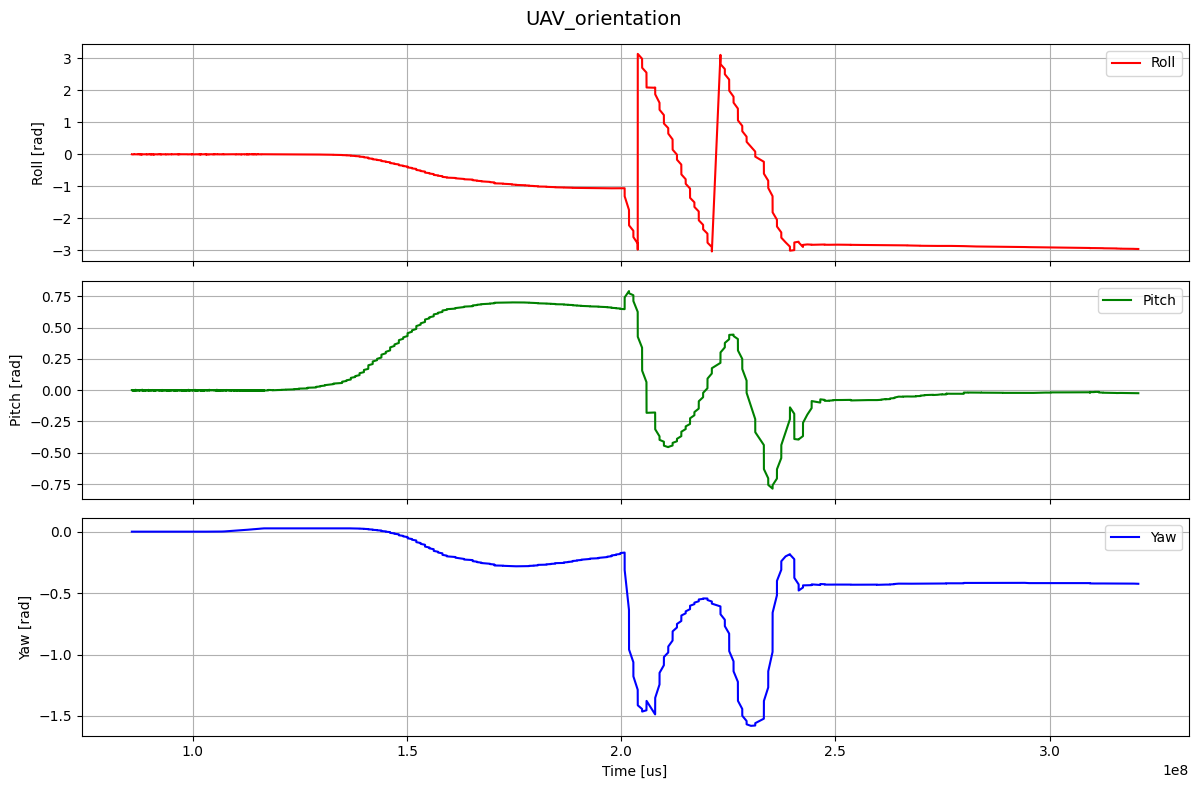

In [4]:
fig, (ax_roll, ax_pitch, ax_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax_roll.plot(df['timestamp_us'], df['roll'], label='Roll', color='r')
ax_roll.set_ylabel("Roll [rad]")
ax_roll.grid(True)
ax_roll.legend()

# Pitch
ax_pitch.plot(df['timestamp_us'], df['pitch'], label='Pitch', color='g')
ax_pitch.set_ylabel("Pitch [rad]")
ax_pitch.grid(True)
ax_pitch.legend()

# Yaw
ax_yaw.plot(df['timestamp_us'], df['yaw'], label='Yaw', color='b')
ax_yaw.set_xlabel("Time [us]")
ax_yaw.set_ylabel("Yaw [rad]")
ax_yaw.grid(True)
ax_yaw.legend()

# タイトルを全体に
fig.suptitle("UAV_orientation", fontsize=14)

plt.tight_layout()
plt.show()

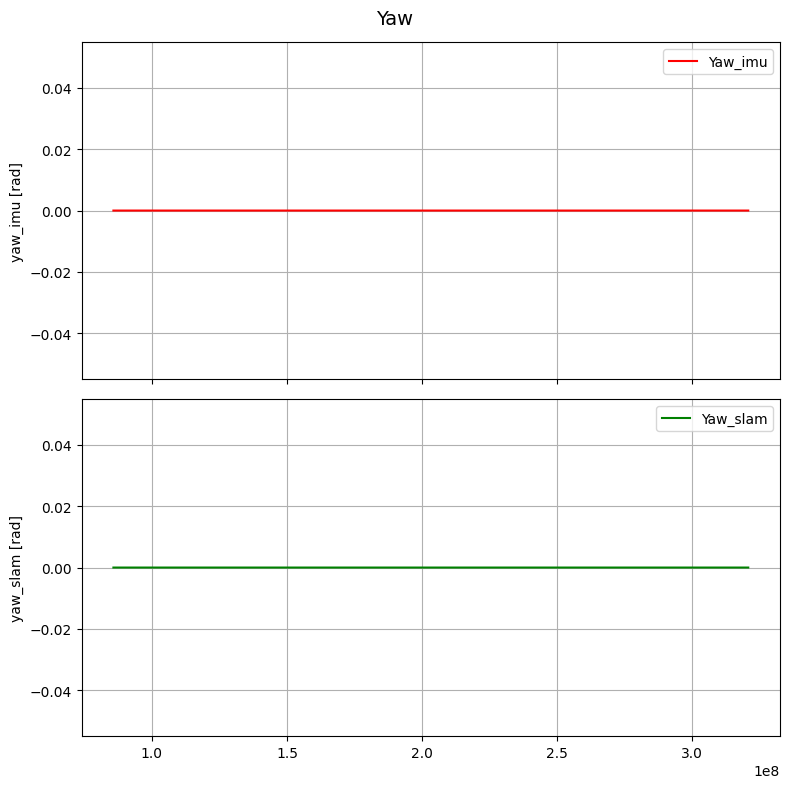

In [5]:
fig, (ax_imuy, imus) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax_imuy.plot(df['timestamp_us'], df['yaw_imu'], label='Yaw_imu', color='r')
ax_imuy.set_ylabel("yaw_imu [rad]")
ax_imuy.grid(True)
ax_imuy.legend()

imus.plot(df['timestamp_us'], df['yaw_slam'], label='Yaw_slam', color='g')
imus.set_ylabel("yaw_slam [rad]")
imus.grid(True)
imus.legend()

# タイトルを全体に
fig.suptitle("Yaw", fontsize=14)

plt.tight_layout()
plt.show()

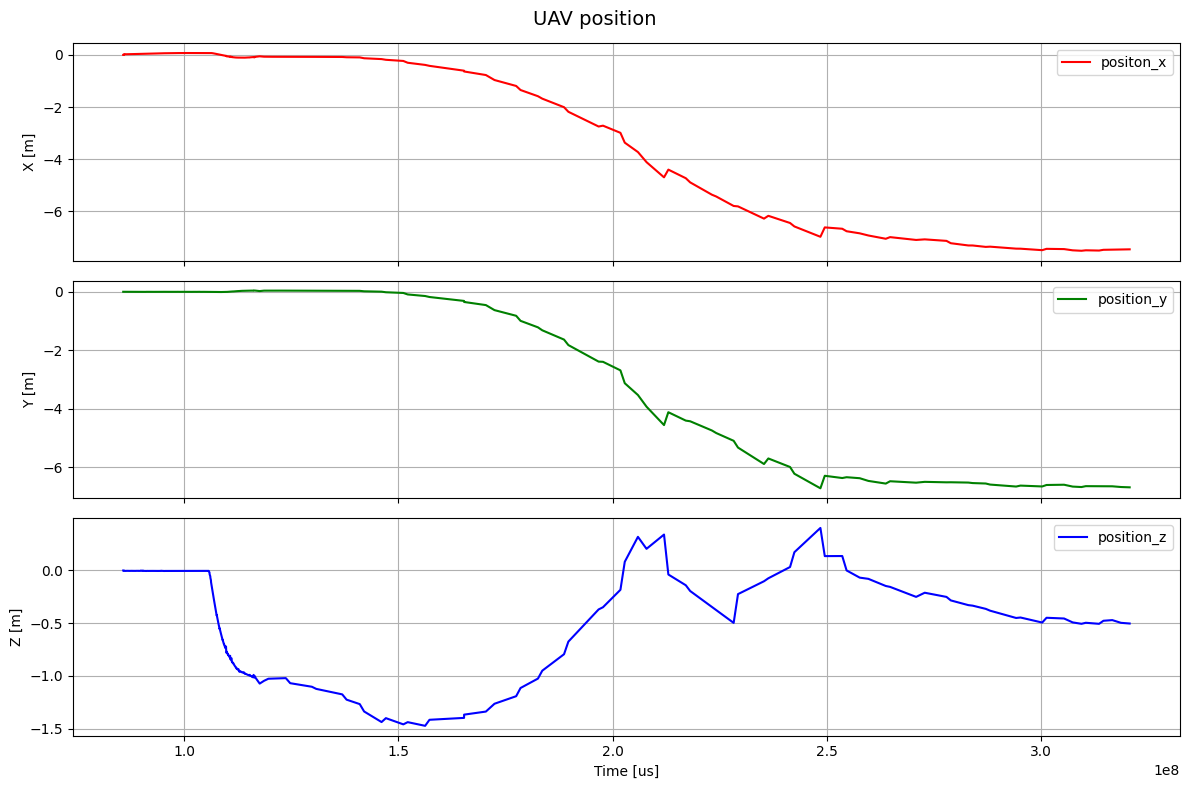

In [6]:
fig, (ax_px, ax_py, ax_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax_px.plot(df['timestamp_us'], df['px'], label='positon_x', color='r')
ax_px.set_ylabel("X [m]")
ax_px.grid(True)
ax_px.legend()

# Pitch
ax_py.plot(df['timestamp_us'], df['py'], label='position_y', color='g')
ax_py.set_ylabel("Y [m]")
ax_py.grid(True)
ax_py.legend()
def quat_to_euler(x, y, z, w):
    t0 = 2.0 * (w * x + y * z)
    t1 = 1.0 - 2.0 * (x * x + y * y)
    roll = np.arctan2(t0, t1)

    t2 = 2.0 * (w * y - z * x)
    t2 = 1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = np.arcsin(t2)

    t3 = 2.0 * (w * z + x * y)
    t4 = 1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(t3, t4)

    return roll, pitch, yaw
# Yaw
ax_pz.plot(df['timestamp_us'], df['pz'], label='position_z', color='b')
ax_pz.set_xlabel("Time [us]")
ax_pz.set_ylabel("Z [m]")
ax_pz.grid(True)
ax_pz.legend()

# タイトルを全体に
fig.suptitle("UAV position", fontsize=14)

plt.tight_layout()
plt.show()

,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw
0,1759137186174,0.062066,-0.033950,0.126088,0.718620,-0.006967,-0.008852,0.695312,-0.022326,-0.003034,1.537865
1,1759137186182,0.062087,-0.033968,0.126418,0.718626,-0.006963,-0.008842,0.695306,-0.022306,-0.003026,1.537847
2,1759137186190,0.062108,-0.033987,0.126772,0.718636,-0.006952,-0.008836,0.695296,-0.022281,-0.003032,1.537819
3,1759137186198,0.062131,-0.034008,0.127148,0.718634,-0.006948,-0.008840,0.695298,-0.022281,-0.003043,1.537825
4,1759137186206,0.062156,-0.034032,0.127549,0.718632,-0.006955,-0.008846,0.695300,-0.022299,-0.003043,1.537831
...,...,...,...,...,...,...,...,...,...,...,...
76017,1759138925093,127.030000,-315.616000,-17.635000,0.999919,-0.012698,-0.000417,-0.000513,-0.025396,-0.000847,-0.001016
76018,1759138925109,127.054000,-315.683000,-17.645200,0.999919,-0.012702,-0.000412,-0.000514,-0.025404,-0.000837,-0.001018
76019,1759138925117,127.067000,-315.717000,-17.650200,0.999919,-0.012698,-0.000415,-0.000515,-0.025397,-0.000843,-0.001020
76020,1759138925125,127.079000,-315.751000,-17.655300,0.999919,-0.012712,-0.000409,-0.000520,-0.025425,-0.000832,-0.001030


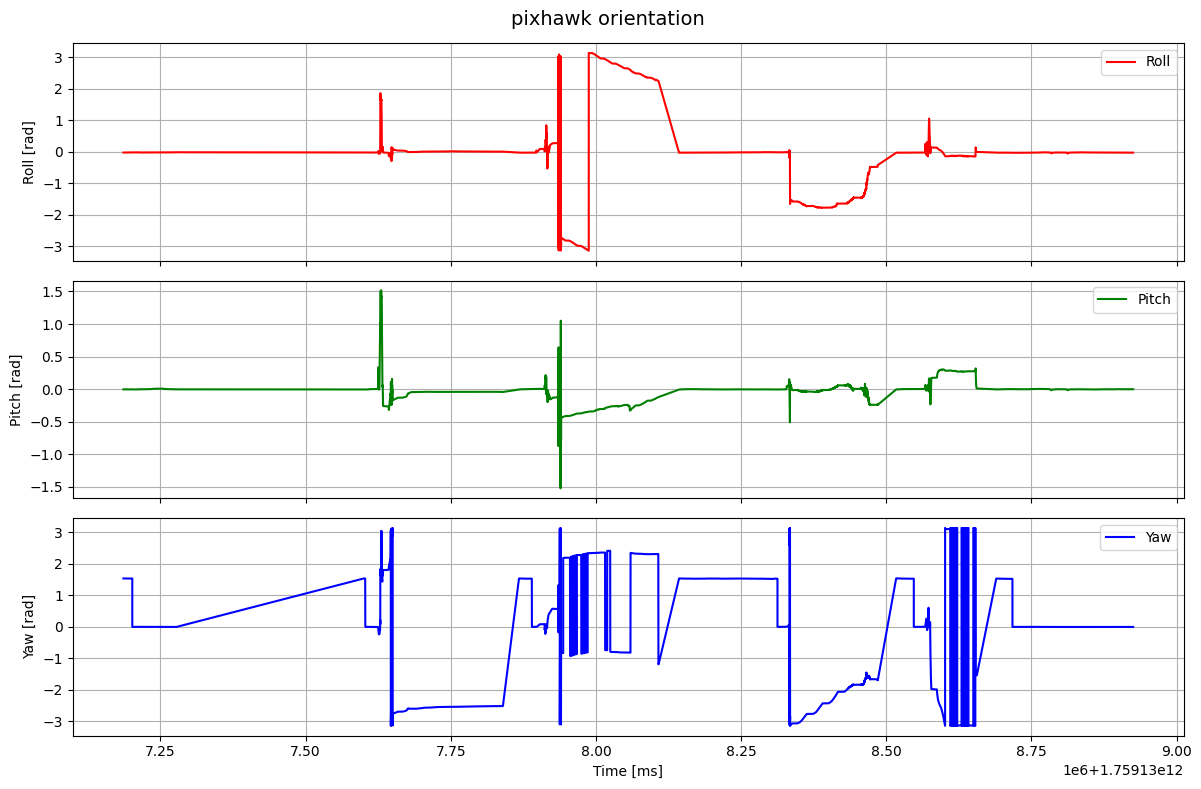

In [7]:
df2 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/pixhawk_odom.csv')
df2 = df2[df2['timestamp_us'] > 1e12]
df2[['roll', 'pitch', 'yaw']] = df2.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
display(df2)
fig, (px_roll, px_pitch, px_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
px_roll.plot(df2['timestamp_us'], df2['roll'], label='Roll', color='r')
px_roll.set_ylabel("Roll [rad]")
px_roll.grid(True)
px_roll.legend()

# Pitch
px_pitch.plot(df2['timestamp_us'], df2['pitch'], label='Pitch', color='g')
px_pitch.set_ylabel("Pitch [rad]")
px_pitch.grid(True)
px_pitch.legend()

# Yaw
px_yaw.plot(df2['timestamp_us'], df2['yaw'], label='Yaw', color='b')
px_yaw.set_xlabel("Time [ms]")
px_yaw.set_ylabel("Yaw [rad]")
px_yaw.grid(True)
px_yaw.legend()

# タイトルを全体に
fig.suptitle("pixhawk orientation", fontsize=14)

plt.tight_layout()
plt.show()

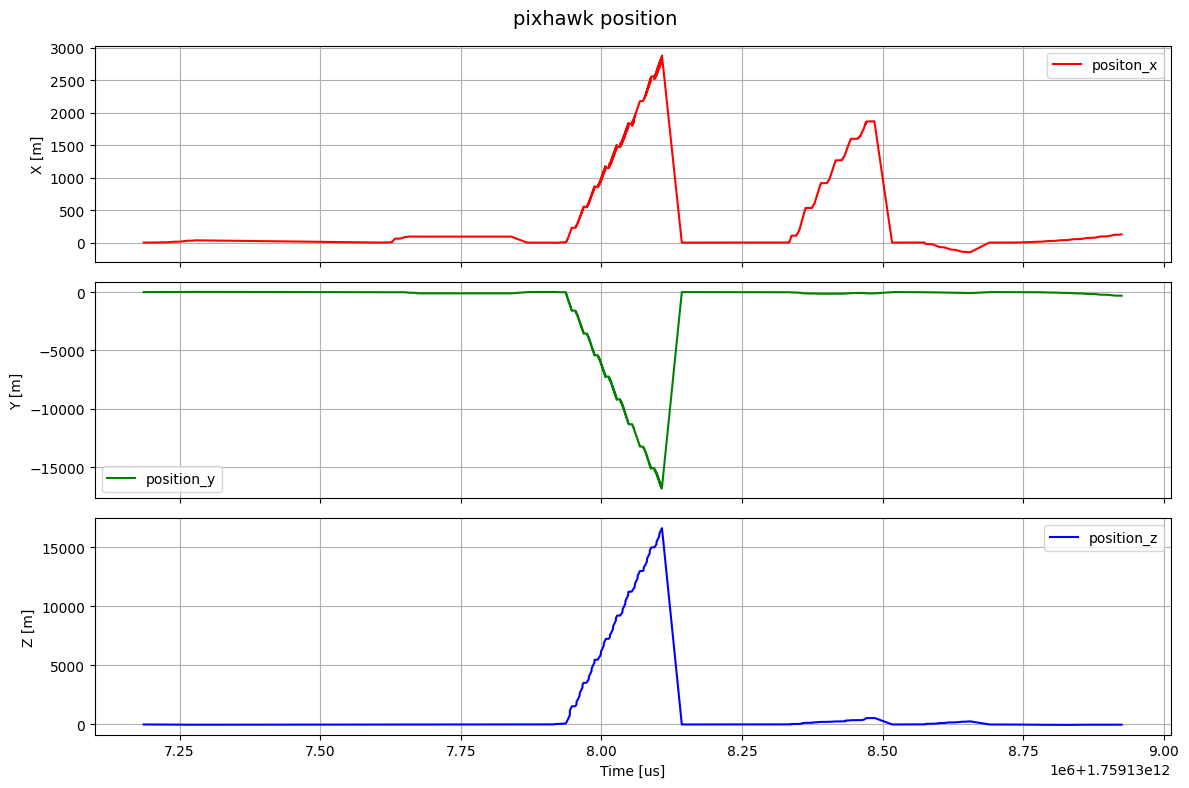

In [8]:
fig, (pix_px, pix_py, pix_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
pix_px.plot(df2['timestamp_us'], df2['px'], label='positon_x', color='r')
pix_px.set_ylabel("X [m]")
pix_px.grid(True)
pix_px.legend()

# Pitch
pix_py.plot(df2['timestamp_us'], df2['py'], label='position_y', color='g')
pix_py.set_ylabel("Y [m]")
pix_py.grid(True)
pix_py.legend()

# Yaw
pix_pz.plot(df2['timestamp_us'], df2['pz'], label='position_z', color='b')
pix_pz.set_xlabel("Time [us]")
pix_pz.set_ylabel("Z [m]")
pix_pz.grid(True)
pix_pz.legend()

# タイトルを全体に
fig.suptitle("pixhawk position", fontsize=14)

plt.tight_layout()
plt.show()

,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw
0,85944493,0.023249,-0.000401,0.003046,1.000000,0.000036,-0.000481,-0.000269,0.000072,-0.000962,-0.000537
1,86074362,0.024104,0.000649,0.003612,1.000000,0.000022,-0.000453,-0.000312,0.000044,-0.000905,-0.000623
2,86245146,0.024984,0.000879,0.003748,1.000000,-0.000099,-0.000563,-0.000304,-0.000198,-0.001127,-0.000608
3,86437817,0.025883,0.001010,0.003524,1.000000,-0.000099,-0.000516,-0.000333,-0.000197,-0.001033,-0.000667
4,86577798,0.026087,0.000900,0.003461,1.000000,-0.000127,-0.000806,-0.000220,-0.000254,-0.001611,-0.000439
...,...,...,...,...,...,...,...,...,...,...,...
220,300498627,-7.433490,6.605010,0.447035,0.023869,-0.965243,-0.258300,0.031897,-3.078920,0.049267,0.524494
221,305576786,-7.476070,6.642760,0.479832,0.025306,-0.963789,-0.262953,0.036415,-3.073500,0.056915,0.534639
222,309687607,-7.488830,6.642800,0.493014,0.022683,-0.964341,-0.260199,0.042763,-3.075376,0.070731,0.529433
223,313759592,-7.476320,6.645530,0.480463,0.026831,-0.964279,-0.260476,0.039967,-3.068818,0.063142,0.529956


,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw


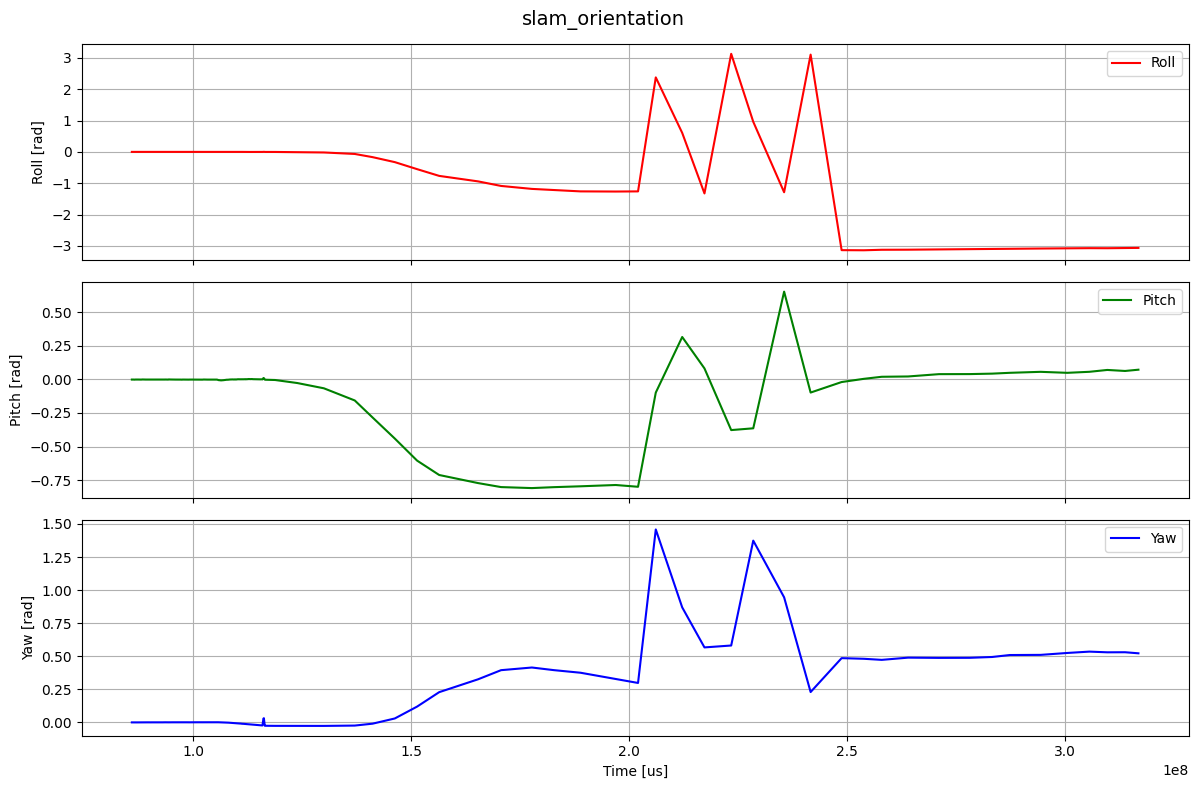

In [9]:
df3 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/slam_odom.csv')
# df3 = df3[df3['timestamp_us'] > 1e12]
df3[['roll', 'pitch', 'yaw']] = df3.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
display(df3)
display(df3[df3['yaw'] > 1.5])
fig, (sx_roll, sx_pitch, sx_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
sx_roll.plot(df3['timestamp_us'], df3['roll'], label='Roll', color='r')
sx_roll.set_ylabel("Roll [rad]")
sx_roll.grid(True)
sx_roll.legend()

# Pitch
sx_pitch.plot(df3['timestamp_us'], df3['pitch'], label='Pitch', color='g')
sx_pitch.set_ylabel("Pitch [rad]")
sx_pitch.grid(True)
sx_pitch.legend()

# Yaw
sx_yaw.plot(df3['timestamp_us'], df3['yaw'], label='Yaw', color='b')
sx_yaw.set_xlabel("Time [us]")
sx_yaw.set_ylabel("Yaw [rad]")
sx_yaw.grid(True)
sx_yaw.legend()

# タイトルを全体に
fig.suptitle("slam_orientation", fontsize=14)

plt.tight_layout()
plt.show()

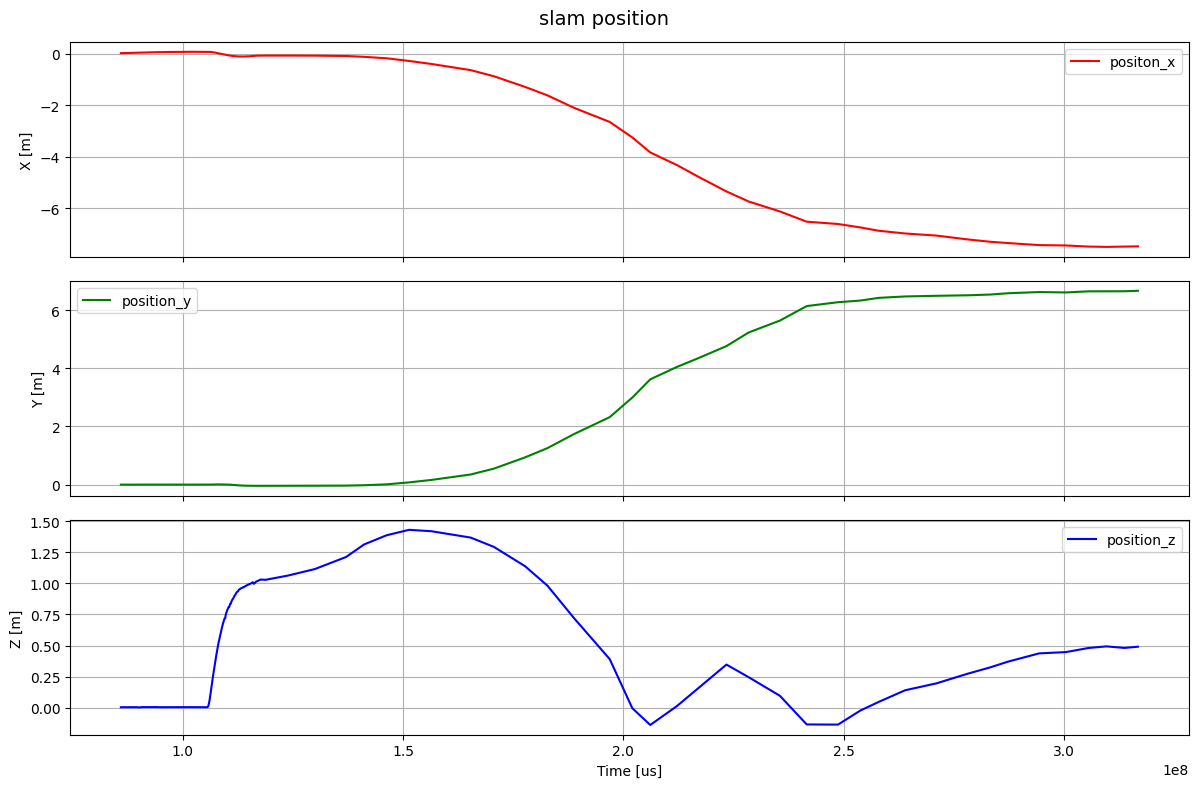

In [10]:
fig, (sx_px, sx_py, sx_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
sx_px.plot(df3['timestamp_us'], df3['px'], label='positon_x', color='r')
sx_px.set_ylabel("X [m]")
sx_px.grid(True)
sx_px.legend()

# Pitch
sx_py.plot(df3['timestamp_us'], df3['py'], label='position_y', color='g')
sx_py.set_ylabel("Y [m]")
sx_py.grid(True)
sx_py.legend()

# Yaw
sx_pz.plot(df3['timestamp_us'], df3['pz'], label='position_z', color='b')
sx_pz.set_xlabel("Time [us]")
sx_pz.set_ylabel("Z [m]")
sx_pz.grid(True)
sx_pz.legend()

# タイトルを全体に
fig.suptitle("slam position", fontsize=14)

plt.tight_layout()
plt.show()

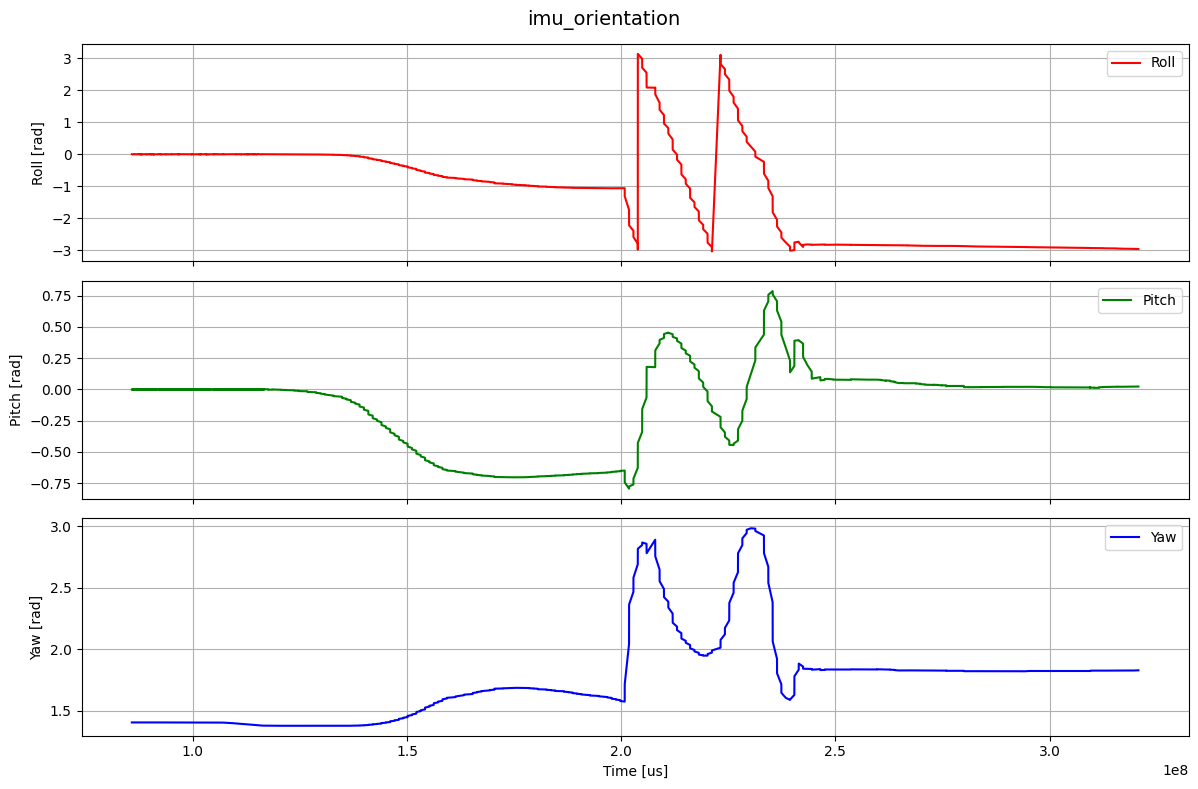

In [11]:
df4 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/madgwick_imu.csv')
df4[['roll', 'pitch', 'yaw']] = df4.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
fig, (ix_roll, ix_pitch, ix_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
ix_roll.plot(df4['timestamp_us'], df4['roll'], label='Roll', color='r')
ix_roll.set_ylabel("Roll [rad]")
ix_roll.grid(True)
ix_roll.legend()

# Pitch
ix_pitch.plot(df4['timestamp_us'], df4['pitch'], label='Pitch', color='g')
ix_pitch.set_ylabel("Pitch [rad]")
ix_pitch.grid(True)
ix_pitch.legend()

# Yaw
ix_yaw.plot(df4['timestamp_us'], df4['yaw'], label='Yaw', color='b')
ix_yaw.set_xlabel("Time [us]")
ix_yaw.set_ylabel("Yaw [rad]")
ix_yaw.grid(True)
ix_yaw.legend()

# タイトルを全体に
fig.suptitle("imu_orientation", fontsize=14)

plt.tight_layout()
plt.show()

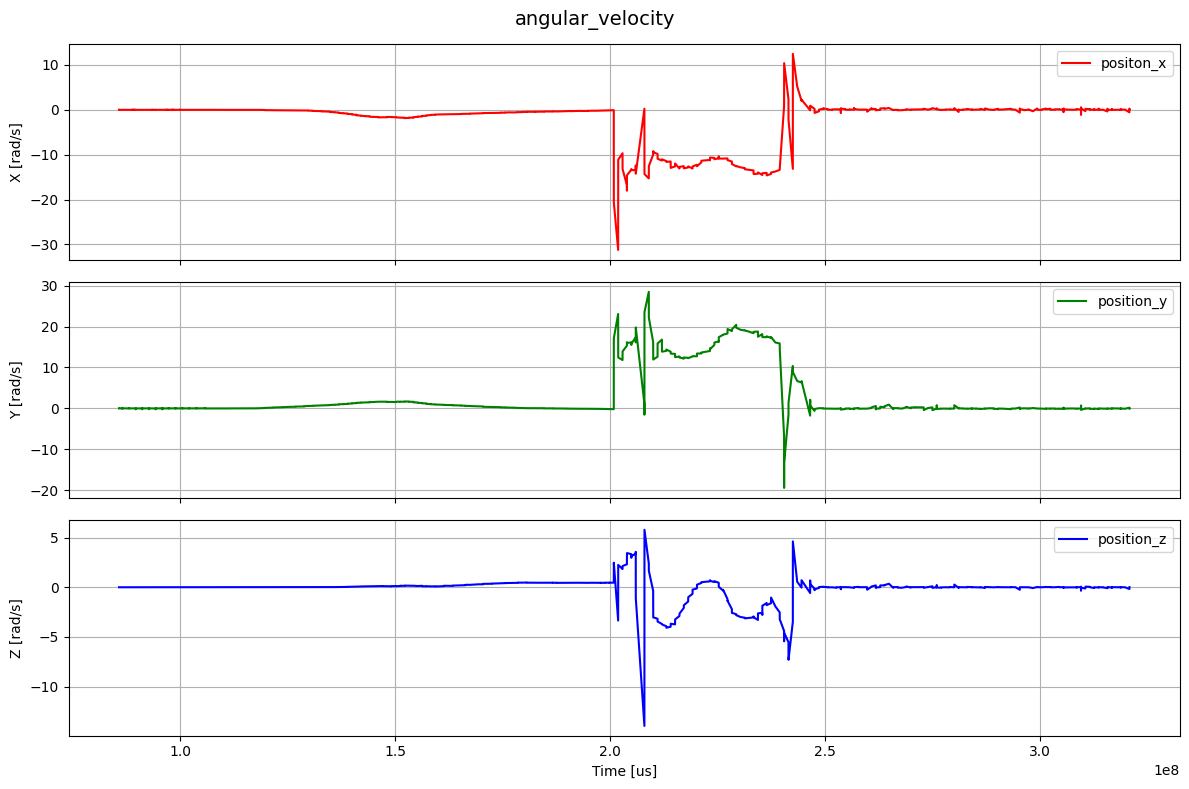

In [12]:
fig, (ix_px, ix_py, ix_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ix_px.plot(df4['timestamp_us'], df4['avx'], label='positon_x', color='r')
ix_px.set_ylabel("X [rad/s]")
ix_px.grid(True)
ix_px.legend()

# Pitch
ix_py.plot(df4['timestamp_us'], df4['avy'], label='position_y', color='g')
ix_py.set_ylabel("Y [rad/s]")
ix_py.grid(True)
ix_py.legend()

# Yaw
ix_pz.plot(df4['timestamp_us'], df4['avz'], label='position_z', color='b')
ix_pz.set_xlabel("Time [us]")
ix_pz.set_ylabel("Z [rad/s]")
ix_pz.grid(True)
ix_pz.legend()

# タイトルを全体に
fig.suptitle("angular_velocity", fontsize=14)

plt.tight_layout()
plt.show()

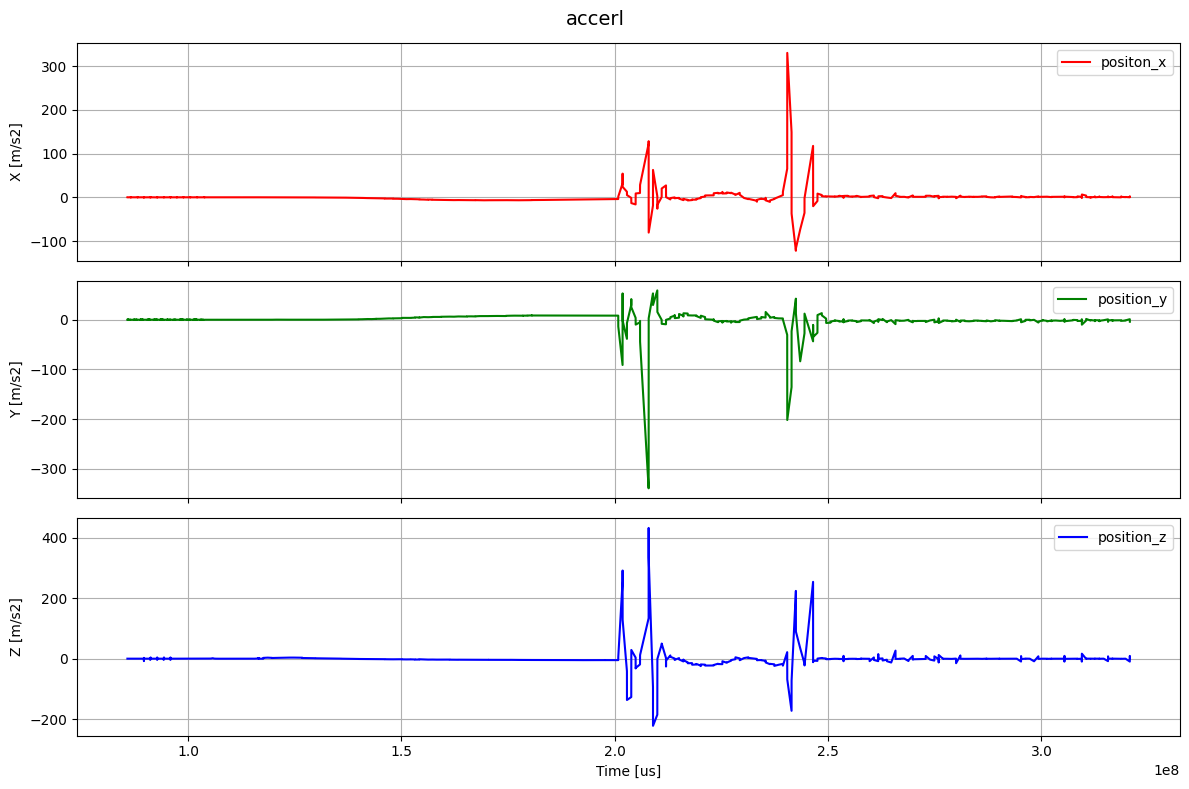

In [13]:
fig, (ax, ay, az) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax.plot(df4['timestamp_us'], df4['ax'], label='positon_x', color='r')
ax.set_ylabel("X [m/s2]")
ax.grid(True)
ax.legend()

# Pitch
ay.plot(df4['timestamp_us'], df4['ay'], label='position_y', color='g')
ay.set_ylabel("Y [m/s2]")
ay.grid(True)
ay.legend()

# Yaw
az.plot(df4['timestamp_us'], df4['az'], label='position_z', color='b')
az.set_xlabel("Time [us]")
az.set_ylabel("Z [m/s2]")
az.grid(True)
az.legend()

# タイトルを全体に
fig.suptitle("accerl", fontsize=14)

plt.tight_layout()
plt.show()